# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading Data

In [3]:
df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
print(df.shape)
print(df.columns)
df.head()

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
x = df.drop(labels='Class', axis=1)
y = df[['Class']]
# Seperating columns
x.head(), y.head()

(   Time        V1        V2        V3  ...       V26       V27       V28  Amount
 0   0.0 -1.359807 -0.072781  2.536347  ... -0.189115  0.133558 -0.021053  149.62
 1   0.0  1.191857  0.266151  0.166480  ...  0.125895 -0.008983  0.014724    2.69
 2   1.0 -1.358354 -1.340163  1.773209  ... -0.139097 -0.055353 -0.059752  378.66
 3   1.0 -0.966272 -0.185226  1.792993  ... -0.221929  0.062723  0.061458  123.50
 4   2.0 -1.158233  0.877737  1.548718  ...  0.502292  0.219422  0.215153   69.99
 
 [5 rows x 30 columns],    Class
 0      0
 1      0
 2      0
 3      0
 4      0)

#### Splitting Data into three parts

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.5, random_state = 69)
test_data, val_data, test_labels, val_labels = train_test_split(test_data, test_labels, test_size=0.3, random_state = 69)
train_data.shape, test_data.shape, val_data.shape

((142403, 30), (99682, 30), (42722, 30))

#### Standarizing the inputs

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
test_data = sc.transform(test_data)
val_data = sc.transform(val_data)

#### Model

In [7]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])  
  return model

In [8]:
model = build_model()
history = model.fit(train_data, train_labels, batch_size=512, epochs=100, validation_data=(val_data, val_labels))

Epoch 1/100
279/279 [==============================] - 1s 3ms/step - loss: 0.4585 - accuracy: 0.7856 - val_loss: 0.0399 - val_accuracy: 0.9988
Epoch 2/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9988 - val_loss: 0.0073 - val_accuracy: 0.9990
Epoch 3/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0061 - val_accuracy: 0.9990
Epoch 4/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0061 - val_accuracy: 0.9991
Epoch 5/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0061 - val_accuracy: 0.9991
Epoch 6/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9991
Epoch 7/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0060 - val_accuracy: 0.9992

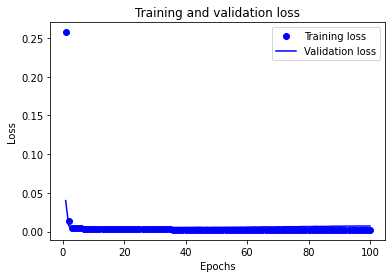

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

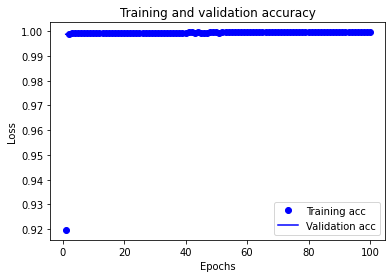

In [10]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the Graphs We can see that we don't need more epochs only 5 are fine

### New Model with less epochs

In [11]:
model = build_model()
history = model.fit(train_data, train_labels, batch_size=512, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
279/279 [==============================] - 1s 2ms/step - loss: 0.4154 - accuracy: 0.8306 - val_loss: 0.0310 - val_accuracy: 0.9986
Epoch 2/5
279/279 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9989 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 3/5
279/279 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0058 - val_accuracy: 0.9991
Epoch 4/5
279/279 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy: 0.9993
Epoch 5/5
279/279 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9991


In [12]:
pred = model.predict(test_data)

#### Converting Probabilites of Prediction and verifying them manually 

In [14]:
a = np.where(pred < 0.5, 0, 1)  # Either one or zero
b = np.where(a == 1, 'Fraud', 'No Fraud') # If data has 1 then fraud was detected
c = np.where(a == test_labels, 'Match', 'No Match') # Checking if the values match dataset
print(c)
print(b)
print('No of values matched', len(c[c=='Match']))
print('No of values not matched', len(c[c=='No Match']))

[['Match']
 ['Match']
 ['Match']
 ...
 ['Match']
 ['Match']
 ['Match']]
[['No Fraud']
 ['No Fraud']
 ['No Fraud']
 ...
 ['No Fraud']
 ['No Fraud']
 ['No Fraud']]
No of values matched 99628
No of values not matched 54
